In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

import matplotlib.pyplot as plt
import seaborn as sns
import anndata

from scroutines import basicu
from scroutines import powerplots
from scroutines.config_plots import *
import importlib
importlib.reload(basicu)

<module 'scroutines.basicu' from '/u/project/zipursky/f7xiesnm/code/scroutines/scroutines/basicu.py'>

In [2]:
sns.set_context('talk')

In [3]:
outdir = "/u/home/f/f7xiesnm/project-zipursky/v1-bb/ms_reanalysis"
outdir

'/u/home/f/f7xiesnm/project-zipursky/v1-bb/ms_reanalysis'

# get data

In [4]:
# get updated cell types
f = "/u/home/f/f7xiesnm/project-zipursky/v1-bb/v1/results/allL23_newtypes.csv"
meta = pd.read_csv(f, index_col=0)
meta

/tmp/ipykernel_11771/12491127.py:3: DtypeWarning: Columns (1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv(f, index_col=0)


,Class_broad,Doublet,Doublet Score,batch,leiden,n_counts,n_genes,percent_mito,sample,Type,Subclass,cond,easitype,umap1,umap2,easisample,easicond,newtype
AAACGCTCACTTCATT-1-P8_1a-P8,Excitatory,False,0.025713,1,0,23384.0,4943,0.000128,P8_1a,L2/3_AB,L2/3,P8NR,L2/3_A,NaN,NaN,1a,1-P08NR,L2/3_A
AAAGGATAGGTGCATG-1-P8_1a-P8,Excitatory,False,0.011883,1,0,17774.0,4698,0.000169,P8_1a,L2/3_AB,L2/3,P8NR,L2/3_A,NaN,NaN,1a,1-P08NR,L2/3_A
AAAGGGCCAGTATACC-1-P8_1a-P8,Excitatory,False,0.024667,1,0,15872.0,4173,0.000126,P8_1a,L2/3_AB,L2/3,P8NR,L2/3_A,NaN,NaN,1a,1-P08NR,L2/3_A
AAAGTCCCATATACCG-1-P8_1a-P8,Excitatory,False,0.027921,1,0,20076.0,4761,0.000050,P8_1a,L2/3_AB,L2/3,P8NR,L2/3_A,NaN,NaN,1a,1-P08NR,L2/3_A
AAAGTCCTCAGATGCT-1-P8_1a-P8,Excitatory,False,0.009527,1,4,19061.0,4601,0.000000,P8_1a,L2/3_BC,L2/3,P8NR,L2/3_C,NaN,NaN,1a,1-P08NR,L2/3_C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTCAGTTGTTG-1-P38_dr_1a,NaN,False,0.042872,11,1,11379.0,3568,0.000879,P38_dr_1a,L2/3_3,L2/3,P38DR,L2/3_C,NaN,NaN,1a,2-P38DR,L2/3_B
TTTGGTTTCTGCCTGT-1-P38_dr_2b,NaN,False,0.007108,2,1,16050.0,3104,0.000062,P38_dr_2b,L2/3_3,L2/3,P38DR,L2/3_C,NaN,NaN,2b,2-P38DR,L2/3_B
TTTGTTGCACCGGTCA-1-P38_dr_2a,NaN,False,0.030928,2,1,13955.0,3739,0.001146,P38_dr_2a,L2/3_3,L2/3,P38DR,L2/3_C,NaN,NaN,2a,2-P38DR,L2/3_B
TTTGTTGGTGGCTAGA-1-P38_dr_2b,NaN,False,0.015884,3,4,7272.0,2789,0.000963,P38_dr_2b,L2/3_2,L2/3,P38DR,L2/3_B,NaN,NaN,2b,2-P38DR,L2/3_A


In [5]:
ddir = '../../data/cheng21_cell_scrna/organized/'
files = [
    'P28NR.h5ad',
    'P38NR.h5ad',
    
    'P28DR.h5ad',
    'P38DR.h5ad',
] 

In [6]:
def one_run(n=200):
    pbulks = []
    xclsts = []
    xcnsts = []

    ncond, nrep, nclst, ngene = 4,2,3,-1#20, -1, #42-3,-1 # remove 3 L4 types

    for f in files:
        print(f)

        path = os.path.join(ddir, f)
        adata = anndata.read(path)
        genes = adata.var.index.values
        adata = adata[adata.obs['Subclass']=='L2/3']

        tmp = adata.obs.copy()
        tmp['newtype'] = meta.loc[tmp.index, 'newtype']
        # labels - by sample and type 
        # 1 or 2
        sample_codes = tmp['sample'].apply(lambda x: x.split('_')[-1][:-1].replace('3', '2')).astype(str).values
        tmp['sample_code'] = sample_codes

        types = tmp['newtype'].astype(str).values

        sample_and_type = sample_codes + "_" + types
        tmp['sample_and_type'] = sample_and_type

        # sample [n - num of cell for each sample and type]
        # n = xxx [here]
        cat_filter = tmp.groupby('sample_and_type').size() > n
        tmp = tmp[tmp['sample_and_type'].isin(cat_filter[cat_filter].index.values)]

        tmp = tmp.groupby('sample_and_type').apply(lambda x: x.sample(n, replace=False))
        cells = tmp.index.get_level_values(level=1)
        adata = adata[cells]

        # update 
        tmp = adata.obs.copy()
        tmp['newtype'] = meta.loc[tmp.index, 'newtype']
        # 1 or 2
        sample_codes = tmp['sample'].apply(lambda x: x.split('_')[-1][:-1].replace('3', '2')).astype(str).values
        tmp['sample_code'] = sample_codes

        types = tmp['newtype'].astype(str).values

        sample_and_type = sample_codes + "_" + types
        tmp['sample_and_type'] = sample_and_type

        # group data
        _xclsts, Xk, Xk_n, Xk_ln = basicu.counts_to_bulk_profiles(adata.X, sample_and_type) 

        unqs, cnts = np.unique(sample_and_type, return_counts=True)

        pbulks.append(Xk_ln)
        xclsts.append(_xclsts)
        xcnsts.append(cnts)

    # use the same types
    xclsts_comm = xclsts[0]
    for a in xclsts[1:]:
        xclsts_comm = np.intersect1d(xclsts_comm, a)

    # has to appear twice
    
    # unq, inv, cnts = np.unique([clst.split('_')[1] for clst in xclsts_comm], return_inverse=True, return_counts=True)
    unq, inv, cnts = np.unique([clst[len('1_'):] for clst in xclsts_comm], return_inverse=True, return_counts=True)
    typelist = unq[cnts==2]
    # xclsts_comm = np.sort([i for i in xclsts_comm if i.split('_')[1] in typelist])
    xclsts_comm = np.sort([i for i in xclsts_comm if i[len('1_'):] in typelist])

    # check 
    tmp = xclsts_comm.reshape(2,-1)
    print(tmp)

    # trim 
    pbulks_trim = []
    xclsts_trim = []
    xcnsts_trim = []
    for a, b, c in zip(pbulks, xclsts, xcnsts):
        b_idx = basicu.get_index_from_array(b, xclsts_comm)
        ap = a[b_idx]
        bp = b[b_idx]
        cp = c[b_idx]
        pbulks_trim.append(ap)
        xclsts_trim.append(bp)
        xcnsts_trim.append(cp)

    pbulks = pbulks_trim
    xclsts = xclsts_trim
    xcnsts = xcnsts_trim

    nclst = int(len(xclsts_comm)/2)

    pbulks = np.array(pbulks)
    xcnsts = np.array(xcnsts)
    xclsts = np.array(xclsts)
    pbulks = pbulks.reshape(ncond,nrep,nclst,-1)
    xcnsts = xcnsts.reshape(ncond,nrep,nclst)
    xclsts = xclsts.reshape(ncond,nrep,nclst)

    pbulks = pbulks.reshape(2,4,pbulks.shape[2], pbulks.shape[3])

    # check the pbulks are good -- log10(CPM+1) for each sample
    checkpbulks = np.sum(np.power(10, pbulks)-1, axis=-1)
    print(np.all(np.abs(checkpbulks-1e6) < 1e-6))

    xclsts_short = np.array([clst[len("1_"):] for clst in xclsts_comm.reshape(2,-1)[0]]) #, '_'

    tensor_nr = pbulks[0].T
    tensor_dr = pbulks[1].T

    # mean exp of CPM=10 in any subclass in either NR or DR
    expressed_nr  = np.any(np.mean(tensor_nr, axis=2) > np.log10(10+1), axis=1) 
    expressed_dr  = np.any(np.mean(tensor_dr, axis=2) > np.log10(10+1), axis=1) 
    expressed_any = np.logical_or(expressed_nr, expressed_dr)

    genes_comm = genes[expressed_any]
    genes_cidx = np.arange(len(genes))[expressed_any] 
    tensor_nr = pbulks[0].T[genes_cidx]
    tensor_dr = pbulks[1].T[genes_cidx]

    # test for each gene and cell type; 4 rep vs 4 rep - t-test and p-val correction 
    ts, ps = ttest_ind(tensor_nr, tensor_dr, axis=2)
    rs, qs, _, _ = multipletests(np.nan_to_num(ps, nan=1).reshape(-1,), method='fdr_bh')
    rs = rs.reshape(ps.shape)
    qs = qs.reshape(ps.shape)

    # effect size
    lfc = np.log2(10)*(np.mean(tensor_dr, axis=2) - np.mean(tensor_nr, axis=2)) # log2FC (log10CPM as raw counts)

    fc_threshold = 2
    cond1   = rs # FDR< 0.05
    cond2   = np.abs(lfc) >  np.log2(fc_threshold) 
    cond2up = lfc         >  np.log2(fc_threshold) 
    cond2dn = lfc         < -np.log2(fc_threshold) 

    sde    = np.all([cond1, cond2],   axis=0)
    sde_up = np.all([cond1, cond2up], axis=0)
    sde_dn = np.all([cond1, cond2dn], axis=0)

    sigsum = pd.DataFrame(index=xclsts_short)
    sigsum['rej']   = np.sum(rs, axis=0)
    sigsum['DE']    = np.sum(sde, axis=0)
    sigsum['DR_up'] = np.sum(sde_up, axis=0)
    sigsum['DR_dn'] = np.sum(sde_dn, axis=0)
    return sigsum

In [7]:
res = []
N = 100
for i in range(20):
    sigsum = one_run(n=N)
    print(i, sigsum.shape)
    res.append(sigsum)

P28NR.h5ad
P38NR.h5ad
P28DR.h5ad
P38DR.h5ad
[['1_L2/3_A' '1_L2/3_B' '1_L2/3_C']
 ['2_L2/3_A' '2_L2/3_B' '2_L2/3_C']]
True
0 (3, 4)
P28NR.h5ad
P38NR.h5ad
P28DR.h5ad
P38DR.h5ad
[['1_L2/3_A' '1_L2/3_B' '1_L2/3_C']
 ['2_L2/3_A' '2_L2/3_B' '2_L2/3_C']]
True
1 (3, 4)
P28NR.h5ad
P38NR.h5ad
P28DR.h5ad
P38DR.h5ad
[['1_L2/3_A' '1_L2/3_B' '1_L2/3_C']
 ['2_L2/3_A' '2_L2/3_B' '2_L2/3_C']]
True
2 (3, 4)
P28NR.h5ad
P38NR.h5ad
P28DR.h5ad
P38DR.h5ad
[['1_L2/3_A' '1_L2/3_B' '1_L2/3_C']
 ['2_L2/3_A' '2_L2/3_B' '2_L2/3_C']]
True
3 (3, 4)
P28NR.h5ad
P38NR.h5ad
P28DR.h5ad
P38DR.h5ad
[['1_L2/3_A' '1_L2/3_B' '1_L2/3_C']
 ['2_L2/3_A' '2_L2/3_B' '2_L2/3_C']]
True
4 (3, 4)
P28NR.h5ad
P38NR.h5ad
P28DR.h5ad
P38DR.h5ad
[['1_L2/3_A' '1_L2/3_B' '1_L2/3_C']
 ['2_L2/3_A' '2_L2/3_B' '2_L2/3_C']]
True
5 (3, 4)
P28NR.h5ad
P38NR.h5ad
P28DR.h5ad
P38DR.h5ad
[['1_L2/3_A' '1_L2/3_B' '1_L2/3_C']
 ['2_L2/3_A' '2_L2/3_B' '2_L2/3_C']]
True
6 (3, 4)
P28NR.h5ad
P38NR.h5ad
P28DR.h5ad
P38DR.h5ad
[['1_L2/3_A' '1_L2/3_B' '1_L2/3_C']
 ['

In [8]:
sigsum

,rej,DE,DR_up,DR_dn
L2/3_A,135,36,30,6
L2/3_B,562,243,119,124
L2/3_C,409,153,105,48


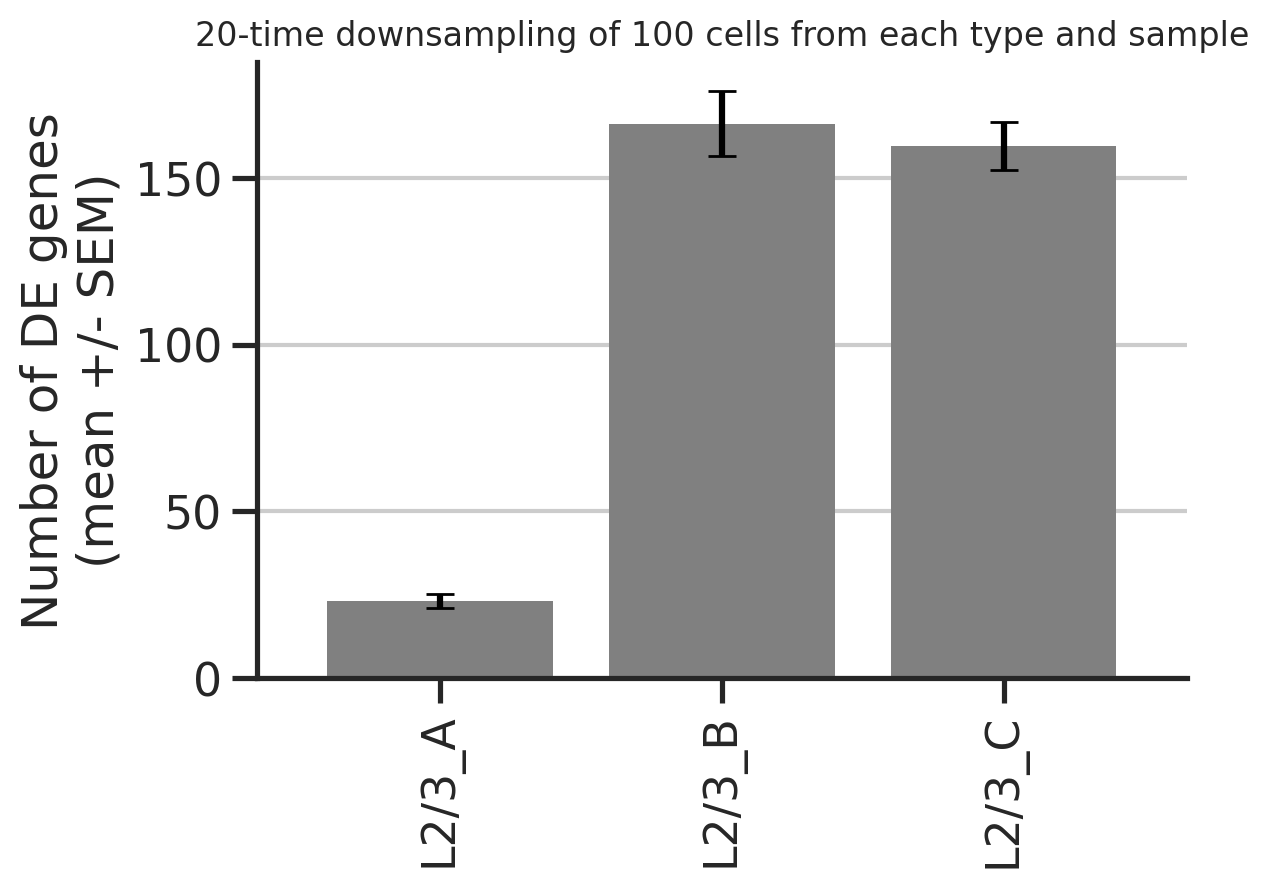

In [9]:
statde = pd.DataFrame(index=res[0].index)
for i in res:
    statde = pd.concat([statde, i['DE']], axis=1)
    # print(i['DE'].values)
mean = statde.mean(axis=1)
std = statde.sem(axis=1)

output = os.path.join(outdir, f'downsamp_deg_type_{N}.pdf')

fig, ax = plt.subplots(figsize=(6,4))
mean.plot.bar(stacked=True, width=0.8, edgecolor='none', color='gray', ax=ax)
ax.errorbar(np.arange(len(mean)), mean, yerr=std, color='k', capsize=5, fmt='o', markersize=0)
ax.set_ylabel('Number of DE genes\n(mean +/- SEM)')
ax.set_title(f'{statde.shape[1]}-time downsampling of {N} cells from each type and sample', fontsize=12)
sns.despine(ax=ax)
ax.grid(axis='x')
powerplots.savefig(fig, output)
plt.show()

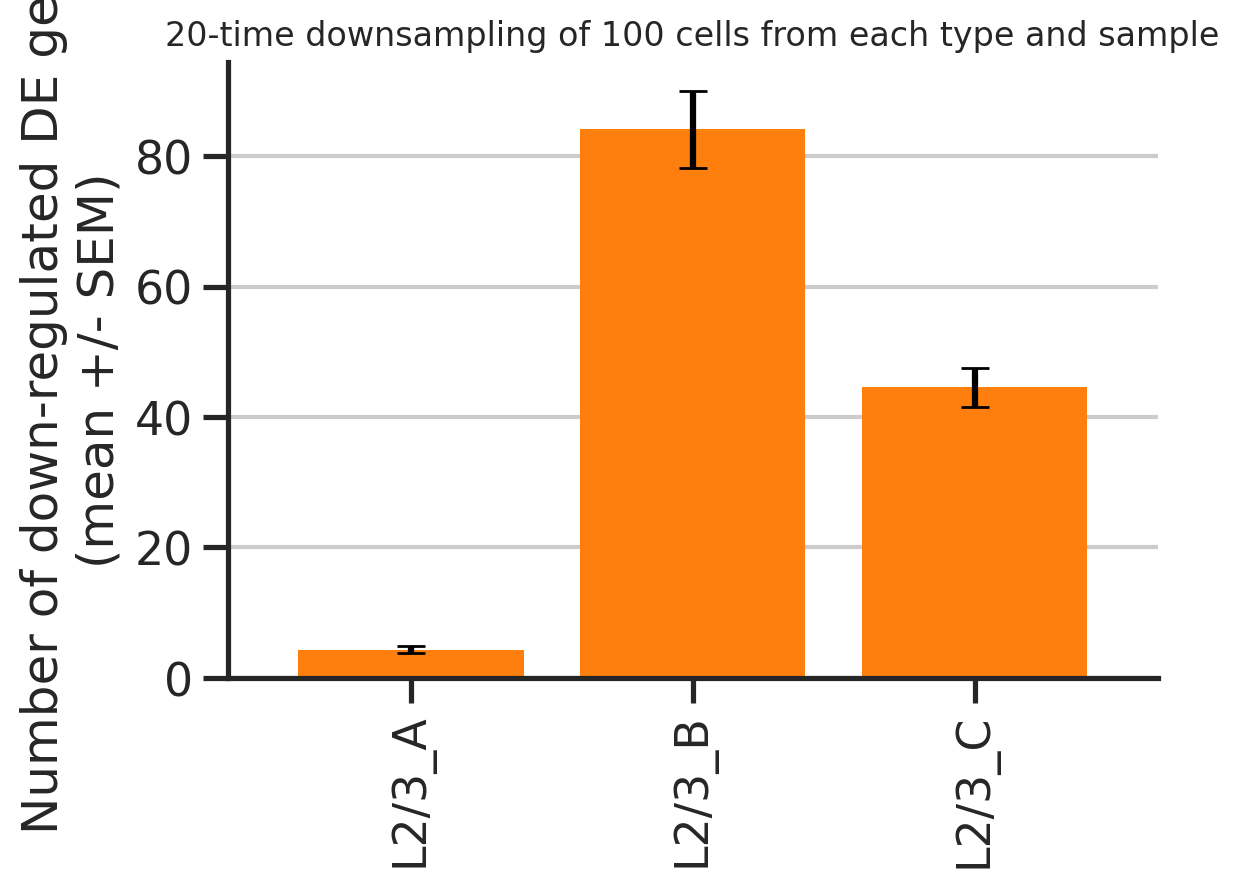

In [10]:
statde = pd.DataFrame(index=res[0].index)
for i in res:
    statde = pd.concat([statde, i['DR_dn']], axis=1)
    # print(i['DE'].values)
    
mean = statde.mean(axis=1)
std = statde.sem(axis=1)

output = os.path.join(outdir, f'downsamp_deg_dn_type_{N}.pdf')

fig, ax = plt.subplots(figsize=(6,4))
mean.plot.bar(stacked=True, width=0.8, edgecolor='none', color='C1', ax=ax)
ax.errorbar(np.arange(len(mean)), mean, yerr=std, color='k', capsize=5, fmt='o', markersize=0)
ax.set_ylabel('Number of down-regulated DE genes\n(mean +/- SEM)')
ax.set_title(f'{statde.shape[1]}-time downsampling of {N} cells from each type and sample', fontsize=12)
sns.despine(ax=ax)
ax.grid(axis='x')
powerplots.savefig(fig, output)
plt.show()

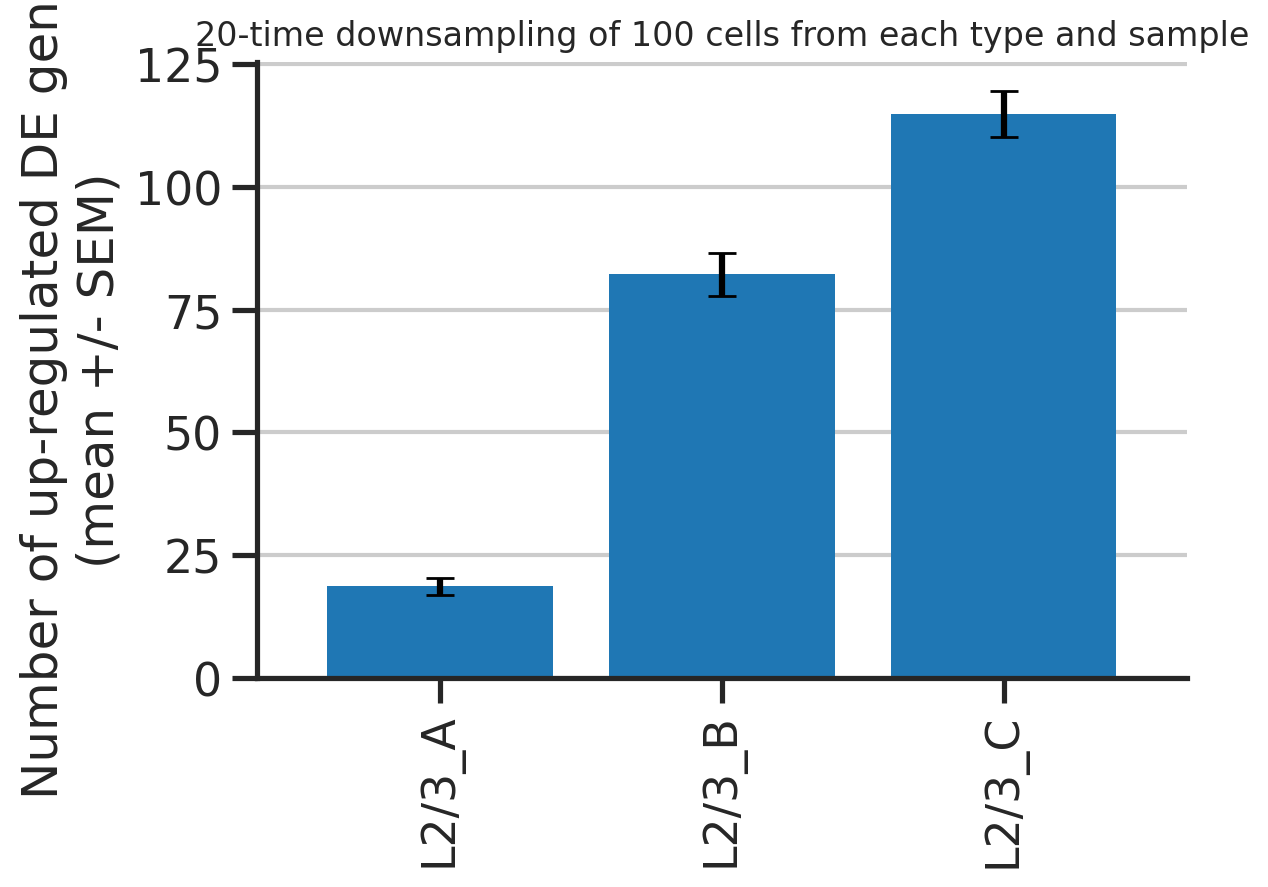

In [11]:
statde = pd.DataFrame(index=res[0].index)
for i in res:
    statde = pd.concat([statde, i['DR_up']], axis=1)
    # print(i['DE'].values)
    
mean = statde.mean(axis=1)
std = statde.sem(axis=1)

output = os.path.join(outdir, f'downsamp_deg_up_type_{N}.pdf')

fig, ax = plt.subplots(figsize=(6,4))
mean.plot.bar(stacked=True, width=0.8, edgecolor='none', color='C0', ax=ax)
ax.errorbar(np.arange(len(mean)), mean, yerr=std, color='k', capsize=5, fmt='o', markersize=0)
ax.set_ylabel('Number of up-regulated DE genes\n(mean +/- SEM)')
ax.set_title(f'{statde.shape[1]}-time downsampling of {N} cells from each type and sample', fontsize=12)
sns.despine(ax=ax)
ax.grid(axis='x')
powerplots.savefig(fig, output)
plt.show()